In [44]:
from scipy import ndimage
from scipy import stats

import numpy as np
import scipy.spatial.distance as dist

import matplotlib
import matplotlib.pyplot as plt


In [49]:
def k_means(K, data, it):
    N=data.shape[0]
    initialArgs = np.random.choice(N, (K,), replace=False)
    centers = data[initialArgs, :]
    oldErr = np.inf
    
    for i in range(it):
        distM = dist.cdist(centers, data)
        assign = np.argmin(distM, axis=0)
        for k in range(K):
            centers[k] = data[assign==k].mean(axis=0)
        err = np.sum(((data[assign]-data)**2))
        if(oldErr<err):
            break
        oldErr = err
    return assign, centers

def readimage(path):
    plt.figure(figsize=(20,10))
    img = ndimage.io.imread(path)/255.
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    img_flatten = img.reshape((-1, 3))
    plt.scatter(img_flatten[:, 0], img_flatten[:, 1], c = img_flatten[:, 2], marker='.')
    plt.show()
    return img.shape, img_flatten

def plotkmeans(shape, img_flatten, centers, assign):
    plt.figure(figsize=(20,10))
    plt.subplot(122)
    plt.scatter(img_flatten[:, 0], img_flatten[:, 1], c = img_flatten[:, 2], marker='.')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='+')
    img_flatten_col= centers[assign]
    plt.subplot(121)
    plt.imshow(img_flatten_col.reshape(shape))
    plt.show()

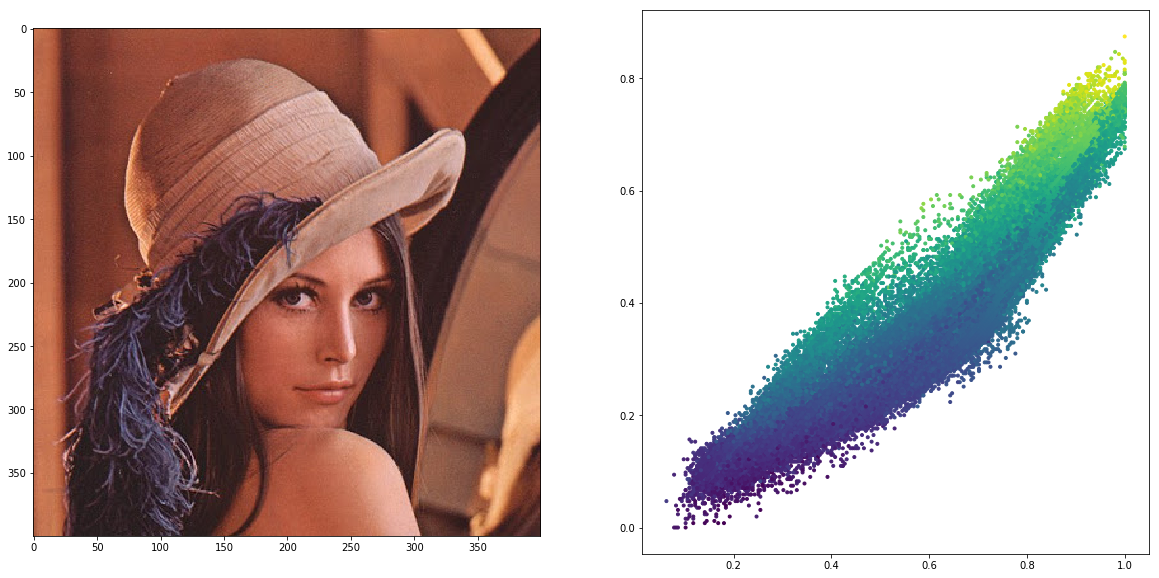

In [73]:
img_size, img_flatten = readimage('images/lena.jpg')

In [33]:
K=16
assign, centers = k_means(K, img_flatten, 10000)


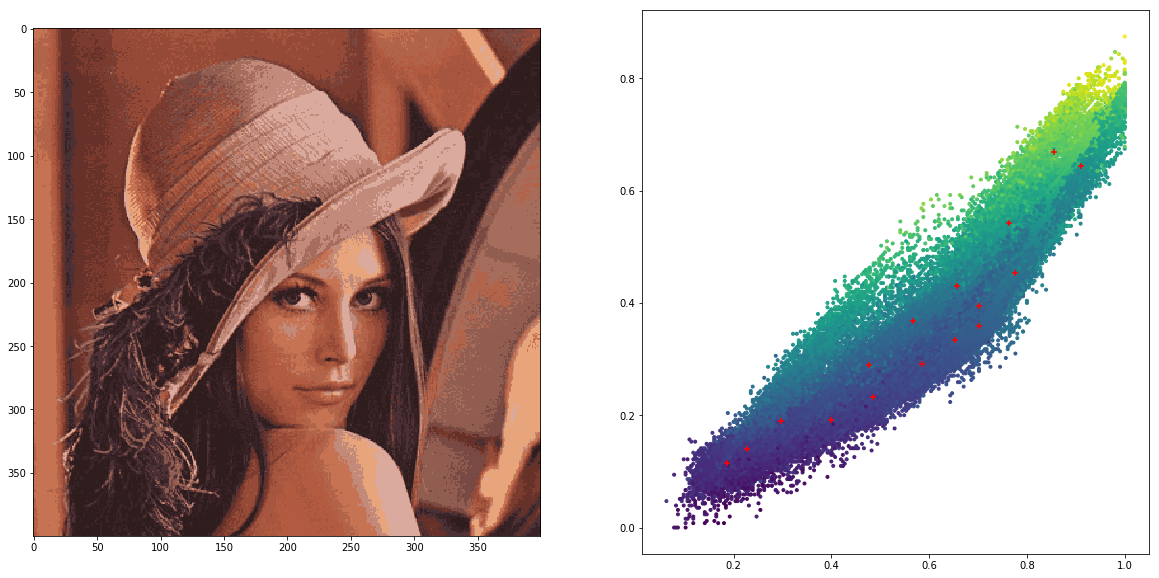

In [51]:
plotkmeans(img_size, img_flatten, centers, assign)

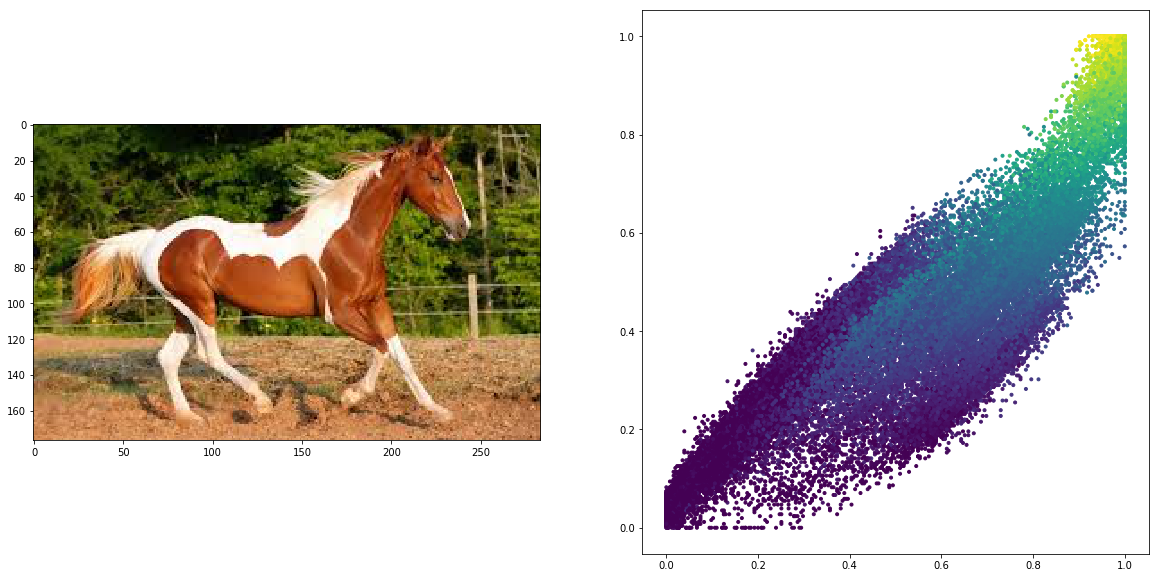

In [52]:
img_size, img_flatten = readimage('images/kon.jpeg')

In [54]:
K=16
assign, centers = k_means(K, img_flatten, 10000)


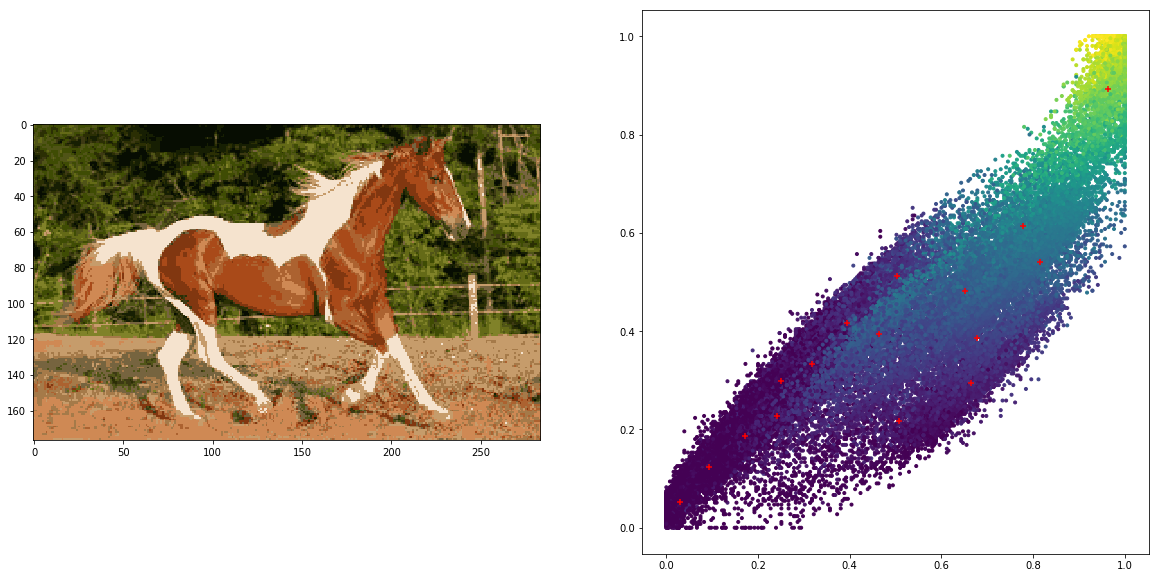

In [55]:
plotkmeans(img_size, img_flatten, centers, assign)

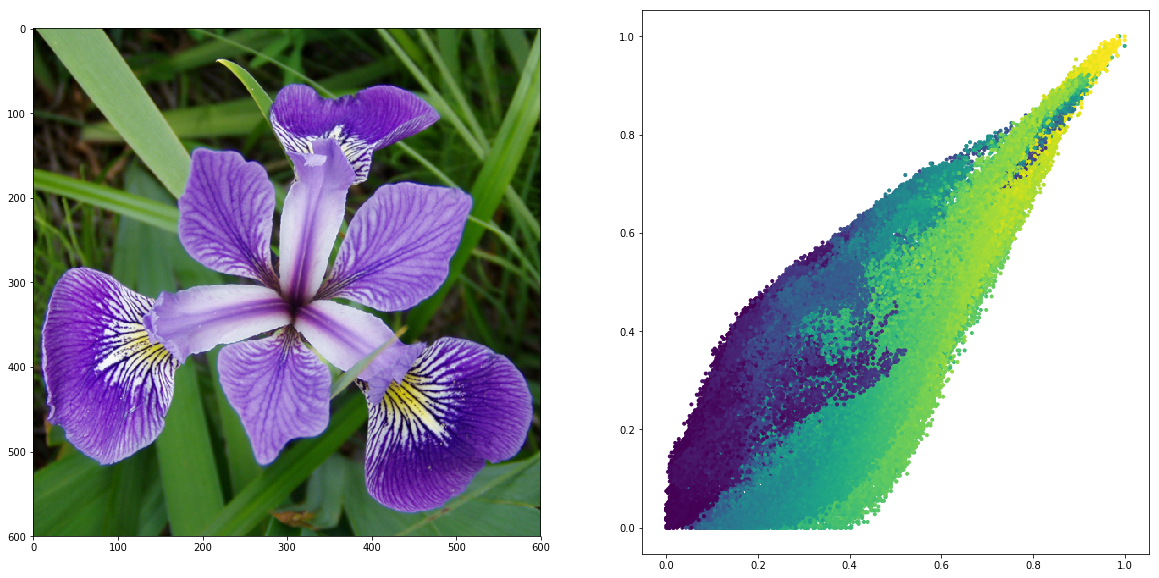

In [56]:
img_size, img_flatten = readimage('images/iris.jpg')

In [57]:
K=16
assign, centers = k_means(K, img_flatten, 10000)

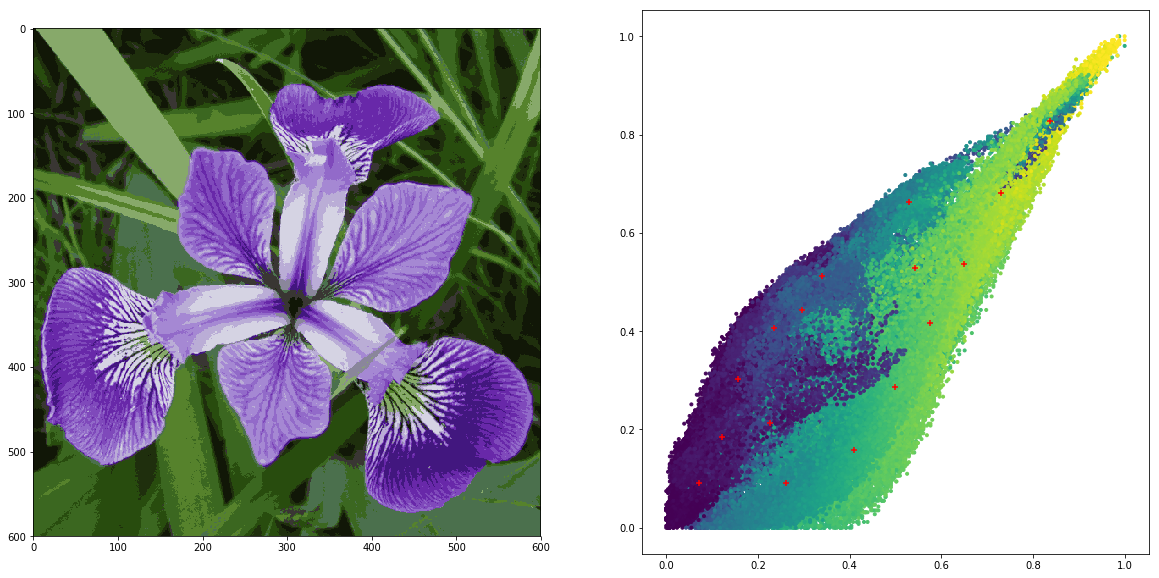

In [58]:
plotkmeans(img_size, img_flatten, centers, assign)

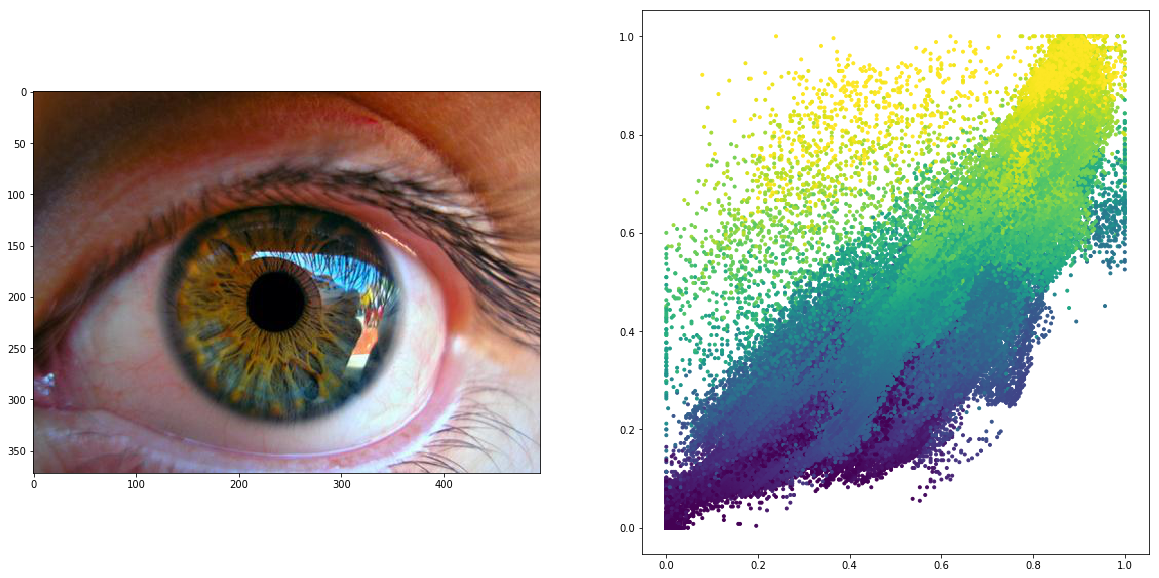

In [59]:
img_size, img_flatten = readimage('images/oko.jpg')

In [62]:
K=16
assign, centers = k_means(K, img_flatten, 10000)

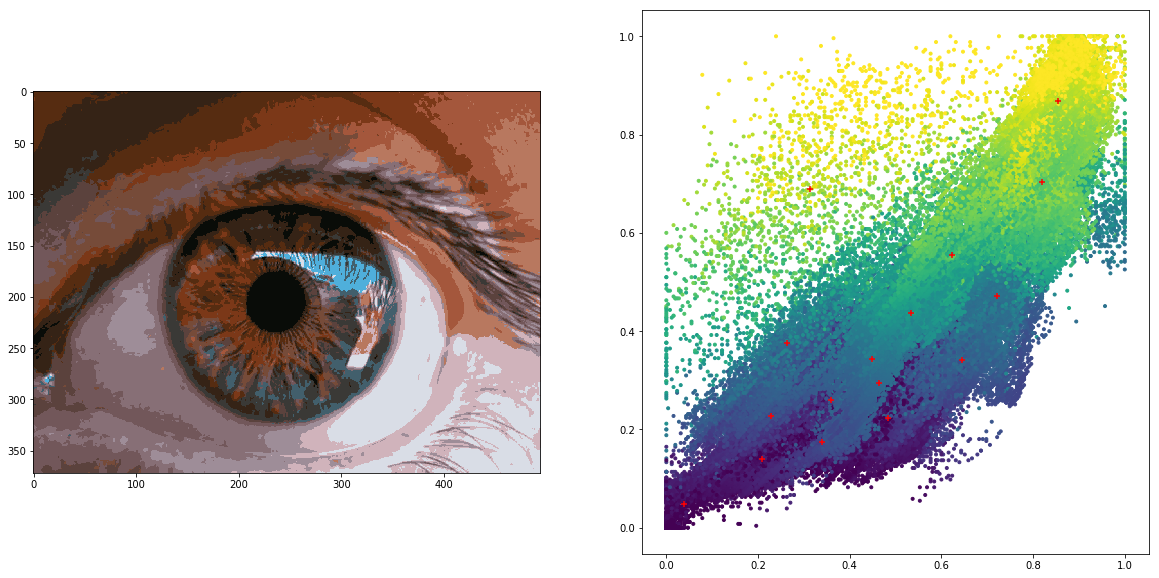

In [63]:
plotkmeans(img_size, img_flatten, centers, assign)

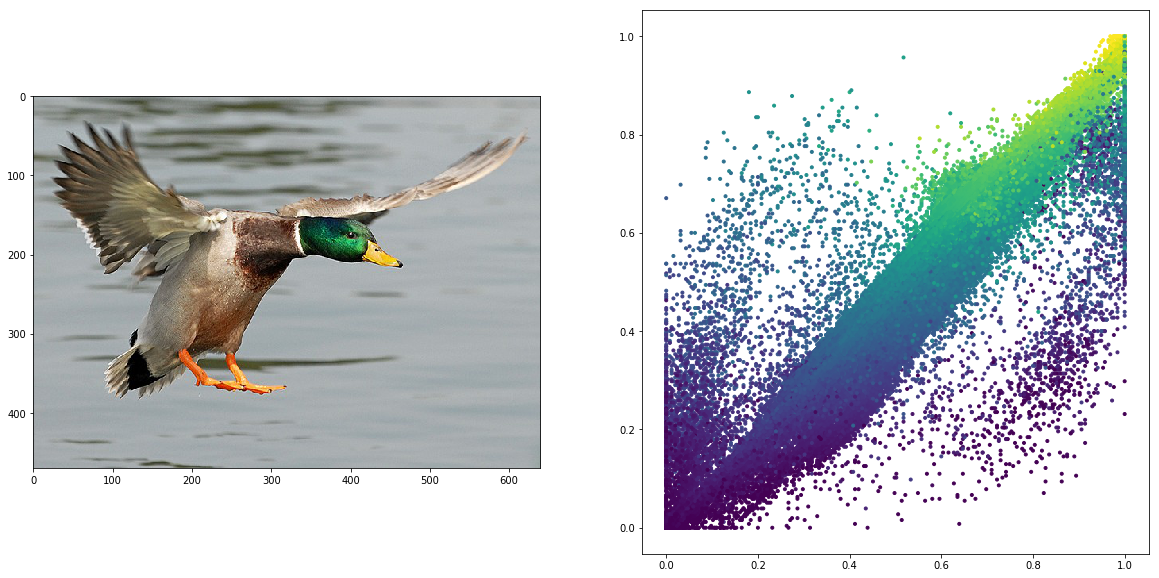

In [66]:
img_size, img_flatten = readimage('images/kaczka.jpg')

In [71]:
K=16
assign, centers = k_means(K, img_flatten, 100000)

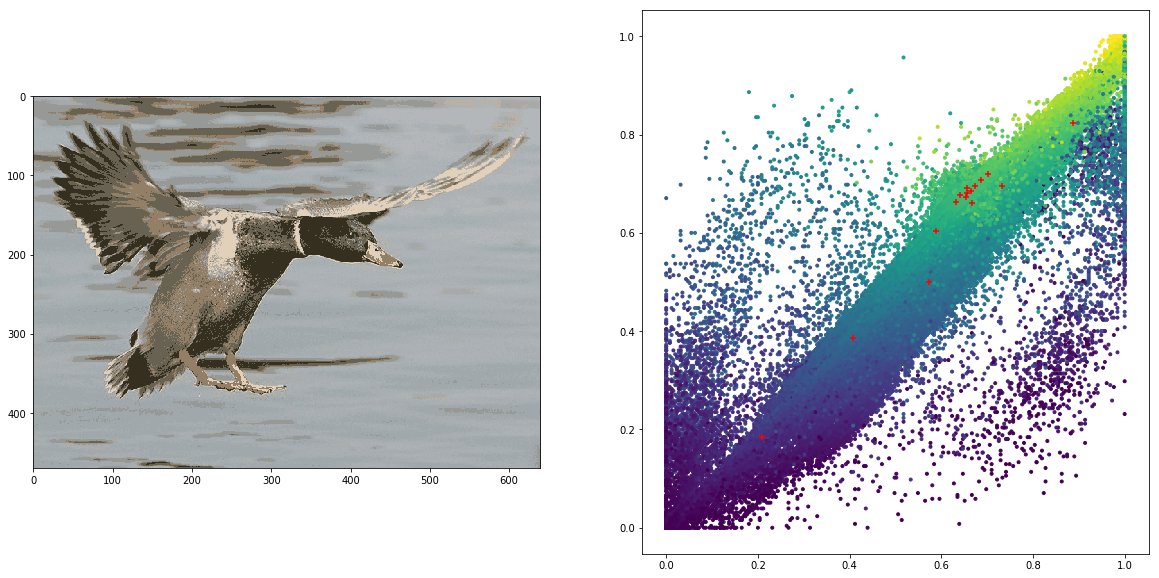

In [72]:
plotkmeans(img_size, img_flatten, centers, assign)